In [2]:
# Attempt at following example code from:
# https://www.tidytextmining.com/ngrams.html
# to build an n-gram tree with the
# twitter data

In [72]:
library(dplyr)
library(tidytext)
library(tidyr)
library(ggplot2)
library(igraph)
library(ggraph)

In [4]:
enUsTwitter10kSubset <- readRDS(file='../data/subsets/enUsTwitter10kSubset.rds')
head(enUsTwitter10kSubset)

[[1]]
[1] "These late night walks are still religion to me. Thank goodness for these."

[[2]]
[1] "Enter to win an Orioles vintage cap by email or tweet the answer to: Which 2 O's pitchers hold the record for the most opening day starts?"

[[3]]
[1] "A Monthly payment plan is now available for those wishing to enroll in Hawaii's #1 RE Investor training program - the Millionaire Mentor..."

[[4]]
[1] "Game time!"

[[5]]
[1] "I feared that this was bound to happen Sugarland almost died 2 who should they sue The State of Indiana? whynot"

[[6]]
[1] "ADDY Awards tonight...plus giving scholarships to 5 deserving students...and something from our young advertising professionals"

In [6]:
text <- c("Because I could not stop for Death -",
          "He kindly stopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortality")

text

[1] "Because I could not stop for Death -"  
[2] "He kindly stopped for me -"            
[3] "The Carriage held but just Ourselves -"
[4] "and Immortality"

In [9]:
str(enUsTwitter10kSubset)

List of 10000
 $ : chr "These late night walks are still religion to me. Thank goodness for these."
 $ : chr "Enter to win an Orioles vintage cap by email or tweet the answer to: Which 2 O's pitchers hold the record for t"| __truncated__
 $ : chr "A Monthly payment plan is now available for those wishing to enroll in Hawaii's #1 RE Investor training program"| __truncated__
 $ : chr "Game time!"
 $ : chr "I feared that this was bound to happen Sugarland almost died 2 who should they sue The State of Indiana? whynot"
 $ : chr "ADDY Awards tonight...plus giving scholarships to 5 deserving students...and something from our young advertisi"| __truncated__
 $ : chr "Staring at my poster that Austin signed for me<3"
 $ : chr "(#ff) I can actually hear you say those words in that calm trademark asian james earl jones voice. Werid!"
 $ : chr "#3WordsForYou Trust in God "
 $ : chr "Thanks again for all the birthday wishes and the birthday love, you guys made my day even greater!"
 $ : chr "th

In [11]:
str(text)

 chr [1:4] "Because I could not stop for Death -" ...


In [14]:
str(unlist(enUsTwitter10kSubset))

 chr [1:10000] "These late night walks are still religion to me. Thank goodness for these." ...


In [28]:
text_df <- tibble(line = 1:length(enUsTwitter10kSubset), text = unlist(enUsTwitter10kSubset))
head(text_df)

line,text
<int>,<chr>
1,These late night walks are still religion to me. Thank goodness for these.
2,Enter to win an Orioles vintage cap by email or tweet the answer to: Which 2 O's pitchers hold the record for the most opening day starts?
3,A Monthly payment plan is now available for those wishing to enroll in Hawaii's #1 RE Investor training program - the Millionaire Mentor...
4,Game time!
5,I feared that this was bound to happen Sugarland almost died 2 who should they sue The State of Indiana? whynot
6,ADDY Awards tonight...plus giving scholarships to 5 deserving students...and something from our young advertising professionals


In [30]:
tail(text_df)

line,text
<int>,<chr>
9995,If I could be naked all the time I would
9996,r u in Freeport ? I love rum runners! Nothing like their fried grouper sandwich & piña colada in the coconut!
9997,That #GameOfThrones was the most intense and amazing episode every and now I must wait a week till the new episode 😥😰
9998,"Cool, nice Saber and Salem and Curtis! Plus gotta love elephants."
9999,Its time to take my relationship serious I'm trying to settle down with her as my life long partner
10000,"Our KidZui Blog is geared toward parents, since parents are usually the ones who research and download KidZui."


In [43]:
wordsDf <- text_df %>%
  unnest_tokens(word, text)

print(head(wordsDf))
print(tail(wordsDf))

# A tibble: 6 x 2
   line word 
  <int> <chr>
1     1 these
2     1 late 
3     1 night
4     1 walks
5     1 are  
6     1 still
# A tibble: 6 x 2
   line word    
  <int> <chr>   
1 10000 ones    
2 10000 who     
3 10000 research
4 10000 and     
5 10000 download
6 10000 kidzui  


In [73]:
wordsDf %>%
  count(word, sort = TRUE) %>%
  head

word,n
<chr>,<int>
the,3915
to,3377
i,3024
a,2548
you,2367
and,1834


In [74]:
#with stop words removed:
data(stop_words)

wordsDf %>%
  anti_join(stop_words) %>%
  count(word, sort = TRUE) %>%
  head

Joining, by = "word"


word,n
<chr>,<int>
love,478
day,393
rt,364
lol,313
time,288
3,247


Joining, by = "word"


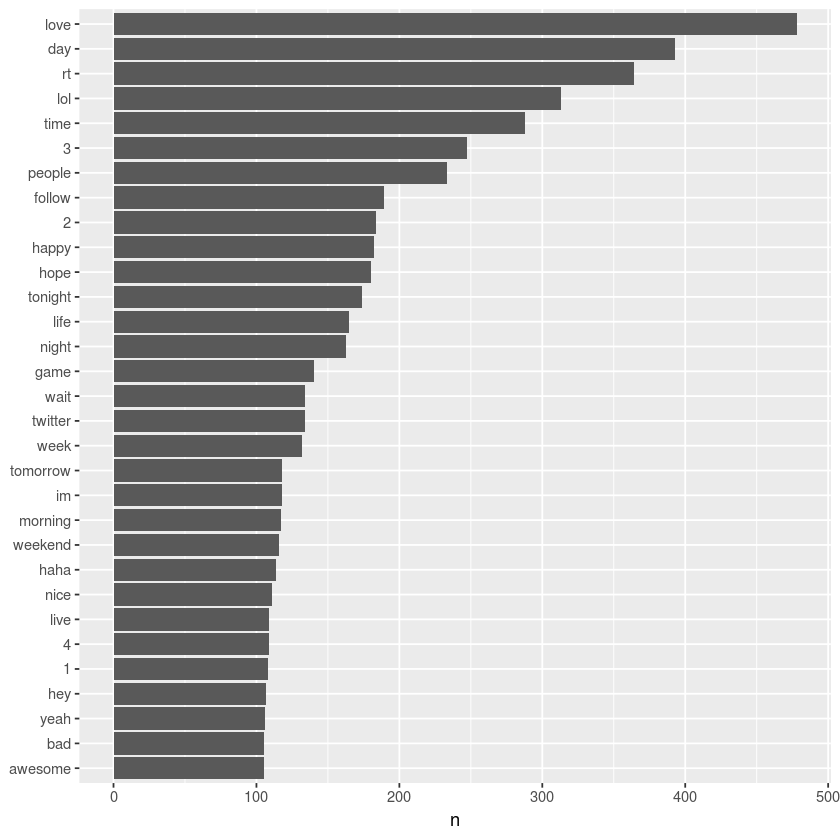

In [60]:
#Plot word frequencies


wordsDf %>%
  anti_join(stop_words) %>%
  count(word, sort = TRUE) %>%
  filter(n > 100) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip()

In [64]:
# Start looking at bi-grams:
# https://www.tidytextmining.com/ngrams.html
bigramsDf <- text_df %>%
  unnest_tokens(bigram, text, token="ngrams", n=2)
head(bigramsDf)

line,bigram
<int>,<chr>
1,these late
1,late night
1,night walks
1,walks are
1,are still
1,still religion


In [68]:
bigramsDf %>%
  count(bigram, sort = TRUE) %>%
  head

bigram,n
<chr>,<int>
in the,299
for the,288
of the,237
on the,199
to be,197
to the,178


In [82]:
bigrams_separated <- bigramsDf %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)

bigramsDfNoStop <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")

# new bigram counts:
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)

head(bigram_counts)

word1,word2,n
<chr>,<chr>,<int>
happy,birthday,34
beep,beep,21
social,media,17
3,3,16
san,diego,14
hell,yeah,13


In [84]:
head(bigramsDfNoStop)

line,bigram
<int>,<chr>
1,late night
1,night walks
2,orioles vintage
2,vintage cap
2,2 o's
2,o's pitchers


In [89]:
#Trigrams
trigramsDf <- text_df %>%
  unnest_tokens(trigram, text, token = "ngrams", n = 3)

trigramsDf %>%
  separate(trigram, c("word1", "word2", "word3"), sep = " ") %>%
  filter(!word1 %in% stop_words$word,
         !word2 %in% stop_words$word,
         !word3 %in% stop_words$word) %>%
  count(word1, word2, word3, sort = TRUE) %>%
  head

word1,word2,word3,n
<chr>,<chr>,<chr>,<int>
NA,NA,NA,279
beep,beep,beep,20
hunter,matt,hunter,9
matt,hunter,matt,9
happy,mothers,day,8
ass,ass,ass,7


In [92]:
# who is saying "beep beep beep"?
trigramsDf %>%
  separate(trigram, c("word1", "word2", "word3"), sep = " ") %>%
  filter(word1 == "beep",
         word2 == "beep",
         word3 == "beep")

line,word1,word2,word3
<int>,<chr>,<chr>,<chr>
69,beep,beep,beep
69,beep,beep,beep
69,beep,beep,beep
69,beep,beep,beep
69,beep,beep,beep
69,beep,beep,beep
69,beep,beep,beep
69,beep,beep,beep
69,beep,beep,beep


In [98]:
text_df[69,]

line,text
<int>,<chr>
69,"beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep , I win ."


In [99]:
# ^^ so it was just one tweet full of 'beeps'

In [103]:
# What are the NA NA NA trigrams?
trigramsDf %>%
  separate(trigram, c("word1", "word2", "word3"), sep = " ") %>%
  filter(is.na(word1),
         is.na(word2),
         is.na(word3)) %>%
  head

line,word1,word2,word3
<int>,<chr>,<chr>,<chr>
4,NA,NA,NA
41,NA,NA,NA
64,NA,NA,NA
109,NA,NA,NA
118,NA,NA,NA
141,NA,NA,NA


In [108]:
text_df[c(4,41,64,109),]

line,text
<int>,<chr>
4,Game time!
41,so sweet
64,hey girl!
109,you're awesome :)


In [116]:
# ^^ looks like any tweet shorter than 3 tokens will come out as a <NA NA NA> trigram

In [279]:
bigram_graph <- bigram_counts %>%
  filter(n > 5) %>%
  graph_from_data_frame()

bigram_graph

IGRAPH 60dfdaa DN-- 46 32 -- 
+ attr: name (v/c), n (e/n)
+ edges from 60dfdaa (vertex names):
 [1] happy      ->birthday  beep       ->beep      social     ->media    
 [4] 3          ->3         san        ->diego     hell       ->yeah     
 [7] 1          ->2         mothers    ->day       ice        ->cream    
[10] rt         ->rt        matt       ->hunter    merry      ->christmas
[13] 2          ->days      hunter     ->matt      ass        ->ass      
[16] ha         ->ha        happy      ->friday    happy      ->mothers  
[19] fall       ->asleep    happy      ->hour      real       ->estate   
[22] stay       ->tuned     valentine's->day       amazing    ->3        
+ ... omitted several edges

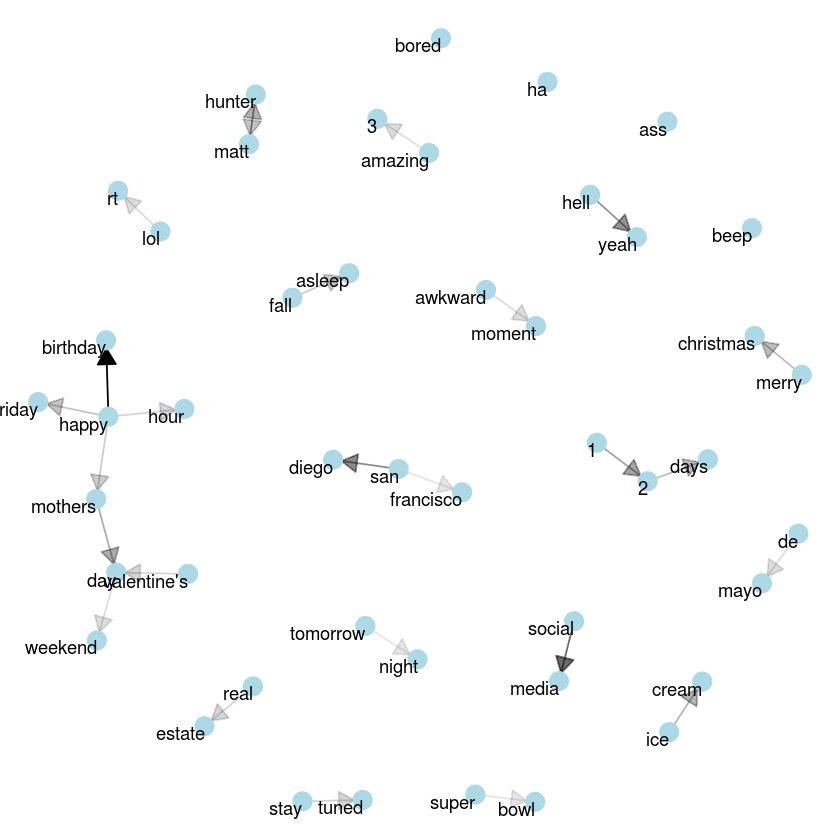

In [280]:
library('ggraph')
set.seed(2016)

a <- grid::arrow(type = "closed", length = unit(.15, "inches"))

ggraph(bigram_graph, layout = "fr") +
  geom_edge_link(aes(edge_alpha = n), show.legend = FALSE,
                 arrow = a, end_cap = circle(.07, 'inches')) +
  geom_node_point(color = "lightblue", size = 5) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  theme_void()

In [154]:
selectedBigrams <-bigramsDf %>%
  separate(bigram, c("word1", "word2"), sep = " ") %>%
  filter(word1 == "dirt") %>%
  head
selectedBigrams

line,word1,word2
<int>,<chr>,<chr>
3701,dirt,and
5851,dirt,poor


In [156]:
text_df[selectedBigrams$line,]

line,text
<int>,<chr>
3701,"Delicious! RT I know, right?! RT : Dirt and worms? Yum and fun!"
5851,have you heard Dirt Poor Robins' version?


In [162]:
bigram_graph

IGRAPH 43b20ba DN-- 17 10 -- 
+ attr: name (v/c), n (e/n)
+ edges from 43b20ba (vertex names):
 [1] happy  ->birthday beep   ->beep     social ->media    3      ->3       
 [5] san    ->diego    hell   ->yeah     1      ->2        mothers->day     
 [9] ice    ->cream    rt     ->rt      

In [166]:
bigram_counts %>%
  filter(n > 10)

word1,word2,n
<chr>,<chr>,<int>
happy,birthday,34
beep,beep,21
social,media,17
3,3,16
san,diego,14
hell,yeah,13
1,2,12
mothers,day,12
ice,cream,11


In [180]:
head(bigram_counts)

word1,word2,n
<chr>,<chr>,<int>
happy,birthday,34
beep,beep,21
social,media,17
3,3,16
san,diego,14
hell,yeah,13


In [281]:
labelled_bigrams <- bigram_counts %>%
    mutate(
        word1Labelled = paste0("1:",word1),
        word2Labelled = paste0("2:",word2),
        n = n
    )

head(labelled_bigrams)

word1,word2,n,word1Labelled,word2Labelled
<chr>,<chr>,<int>,<chr>,<chr>
happy,birthday,34,1:happy,2:birthday
beep,beep,21,1:beep,2:beep
social,media,17,1:social,2:media
3,3,16,1:3,2:3
san,diego,14,1:san,2:diego
hell,yeah,13,1:hell,2:yeah


In [178]:
bigram = "these late"

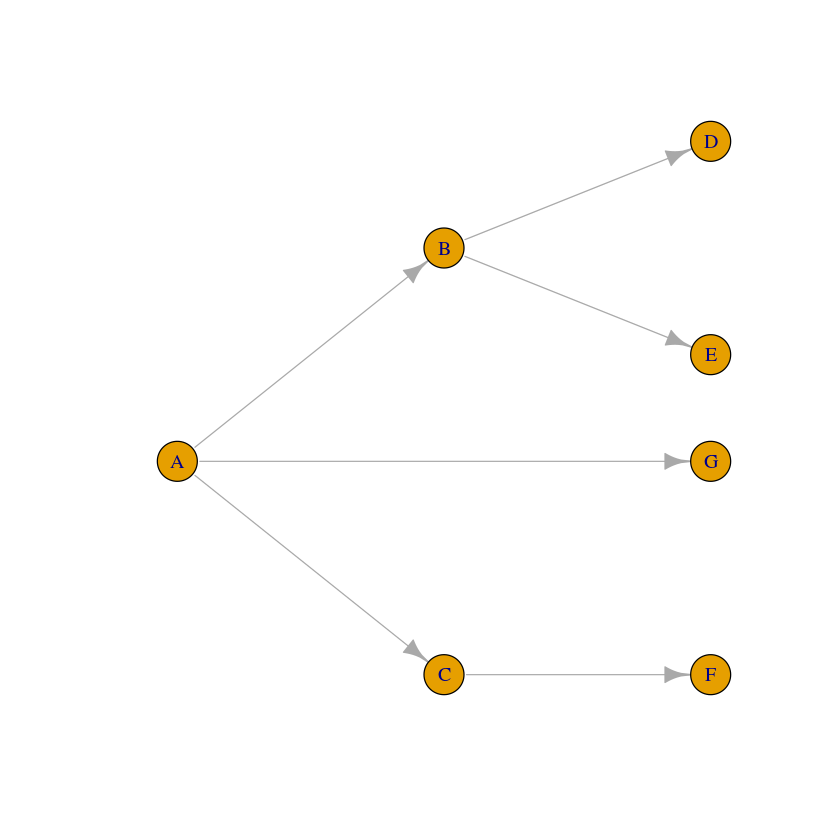

In [275]:
# Plotting tripartite graphs (example)
# https://stackoverflow.com/questions/28974206/visualizing-graph-network-with-3-layeres-tripartite-in-r-igraph
edge_P_C <- read.table(text="P C
A B
A C", header=T)

edge_C_G <- read.table(text="C G
B D
B E
C F", header=T)

edge_P_G <- read.table(text="P G
A G", header=T)


#2. Create graph
all_edges <- do.call(rbind,
  lapply( list(edge_C_G, edge_P_C, edge_P_G), function(x) setNames(x, c("1","2")) )
)

g1 <- graph.data.frame(d = all_edges, directed = TRUE)

                     
#3. Plot                     
v_layers_df <- unique( rbind(
  expand.grid( ID = edge_P_C$P, Layer = 1),
  expand.grid( ID = edge_P_G$P, Layer = 1),
  expand.grid( ID = edge_P_C$C, Layer = 2),
  expand.grid( ID = edge_C_G$C, Layer = 2),
  expand.grid( ID = edge_C_G$G, Layer = 3),
  expand.grid( ID = edge_P_G$G, Layer = 3)
))

v_layers <- setNames( v_layers_df$Layer, v_layers_df$ID)
V(g1)$layer <- v_layers[V(g1)$name]
                     
layout.k_partite <- function(g) {
  l <- layout.sugiyama(g)$layout[,2:1]
  l[,1] <- unlist(V(g)$layer)
  l[,2] <- - l[,2] + 1 + max(l[,2])
  l
}
                     
plot(g1, layout = layout.k_partite(g1))

In [234]:
g1

IGRAPH 3e345f7 DN-- 7 6 -- 
+ attr: name (v/c), layer (v/n)
+ edges from 3e345f7 (vertex names):
[1] B->D B->E C->F A->B A->C A->G

In [394]:
head(labelled_bigrams)

word1,word2,n,word1Vertex,word2Labelled
<chr>,<chr>,<int>,<chr>,<chr>
happy,birthday,34,1:happy,2:birthday
beep,beep,21,1:beep,2:beep
social,media,17,1:social,2:media
3,3,16,1:3,2:3
san,diego,14,1:san,2:diego
hell,yeah,13,1:hell,2:yeah


In [395]:
bigram_graph <- labelled_bigrams %>%
  filter(n > 5) %>%
  select('word1Labelled', 'word2Labelled') %>% 
  graph_from_data_frame()

bigram_graph

ERROR: Unknown column `word1Labelled` 

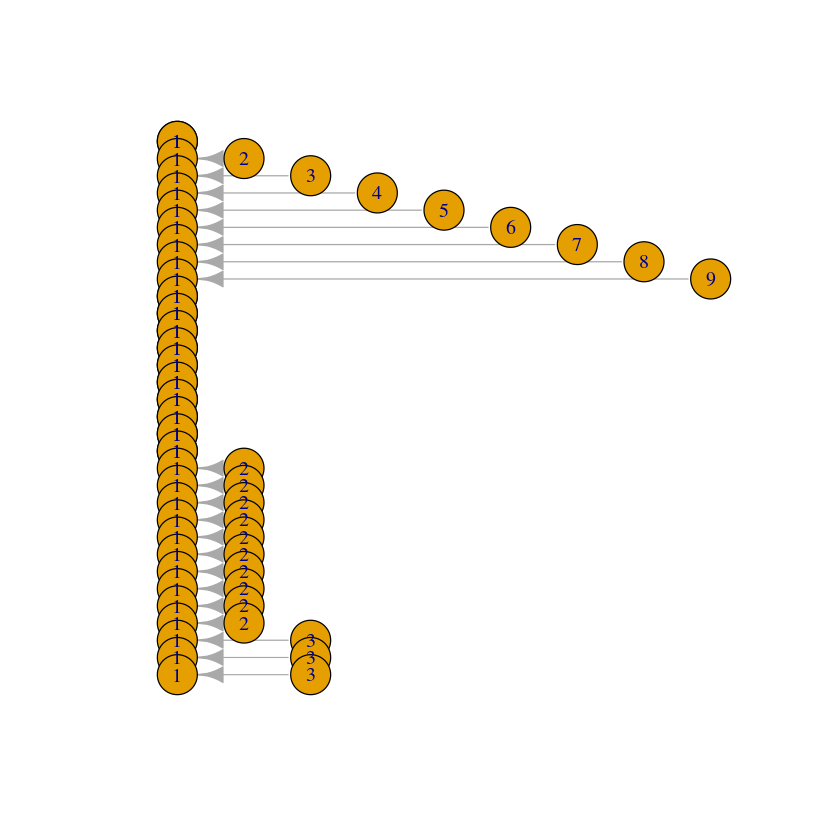

In [396]:
# V(bigram_graph)$layer <- V(bigram_graph)$name

bigram_graph <- set_vertex_attr(bigram_graph, "layer", value=as.integer(lapply(V(bigram_graph)$name, substring, 0, 1)))
bigram_graph <- set_vertex_attr(bigram_graph, "name", value=as.integer(lapply(V(bigram_graph)$name, substring, 0, 1)))

plot(bigram_graph, layout = layout.k_partite(bigram_graph))

# layout.k_partite(bigram_graph)

In [273]:
unlist(V(bigram_graph)$layer)

[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2

In [274]:
l <- layout.sugiyama(bigram_graph)$layout[,2:1]
l[,1] <- unlist(V(bigram_graph)$layer)
l[,2] <- - l[,2] + 1 + max(l[,2])
l

1,10
1,9
1,8
1,7
1,6
1,5
1,4
1,3
1,2
1,1
2,10


In [288]:
labelled_bigrams <- bigram_counts %>%
    mutate(
        word1Vertex = paste0("1:",word1),
        word2Labelled = paste0("2:",word2),
        n = n
    )

head(labelled_bigrams)

word1,word2,n,word1Vertex,word2Labelled
<chr>,<chr>,<int>,<chr>,<chr>
happy,birthday,34,1:happy,2:birthday
beep,beep,21,1:beep,2:beep
social,media,17,1:social,2:media
3,3,16,1:3,2:3
san,diego,14,1:san,2:diego
hell,yeah,13,1:hell,2:yeah


In [292]:
head(bigram_counts)

word1,word2,n
<chr>,<chr>,<int>
happy,birthday,34
beep,beep,21
social,media,17
3,3,16
san,diego,14
hell,yeah,13


In [335]:
numNGrams <- nrow(bigram_counts)
bigram_counts$word1Vertex <- 1:numNGrams
bigram_counts$word2Vertex <- 1:numNGrams + nrow(bigram_counts)
head(bigram_counts)

word1,word2,n,word1Vertex,word2Vertex
<chr>,<chr>,<int>,<int>,<int>
happy,birthday,34,1,17780
beep,beep,21,2,17781
social,media,17,3,17782
3,3,16,4,17783
san,diego,14,5,17784
hell,yeah,13,6,17785


In [299]:
tail(bigram_counts)

word1,word2,n,word1Vertex,word2Vertex
<chr>,<chr>,<int>,<int>,<int>
zoom,lens,1,17774,35553
zou,bisou,1,17775,35554
zucotti,park,1,17776,35555
zumba,mode,1,17777,35556
zune,rhapsody,1,17778,35557
zz,dp's,1,17779,35558


In [328]:
bigram_graph <- bigram_counts %>%
  filter(n > 5) %>%
  select(word1Vertex, word2Vertex) %>%
  graph_from_data_frame()

bigram_graph

IGRAPH 27cd617 DN-- 64 32 -- 
+ attr: name (v/c)
+ edges from 27cd617 (vertex names):
 [1] 1 ->17780 2 ->17781 3 ->17782 4 ->17783 5 ->17784 6 ->17785 7 ->17786
 [8] 8 ->17787 9 ->17788 10->17789 11->17790 12->17791 13->17792 14->17793
[15] 15->17794 16->17795 17->17796 18->17797 19->17798 20->17799 21->17800
[22] 22->17801 23->17802 24->17803 25->17804 26->17805 27->17806 28->17807
[29] 29->17808 30->17809 31->17810 32->17811

In [347]:
bigram_graph <- bigram_counts %>%
  filter(n > 5) %>%
  select(word1Vertex, word2Vertex) %>%
  graph_from_data_frame()


# vertex to name
vertexNames <- bind_rows(
    select(bigram_counts, name=word1, vertex=word1Vertex),
    select(bigram_counts, name=word2, vertex=word2Vertex)
)

vertexToName <- function(v) {
    filter(vertexNames, vertex == v)$name
}

vertexToLayer <- function(v) {
    floor(v/numNGrams)
}

# bigram_graph <- set_vertex_attr(bigram_graph, "layer", value=sapply(as.numeric(V(bigram_graph)$name), vertexToLayer))
# bigram_graph <- set_vertex_attr(bigram_graph, "name", value=sapply(V(bigram_graph)$name, vertexToName))

bigram_graph

IGRAPH ea3ea09 DN-- 64 32 -- 
+ attr: name (v/c)
+ edges from ea3ea09 (vertex names):
 [1] 1 ->17780 2 ->17781 3 ->17782 4 ->17783 5 ->17784 6 ->17785 7 ->17786
 [8] 8 ->17787 9 ->17788 10->17789 11->17790 12->17791 13->17792 14->17793
[15] 15->17794 16->17795 17->17796 18->17797 19->17798 20->17799 21->17800
[22] 22->17801 23->17802 24->17803 25->17804 26->17805 27->17806 28->17807
[29] 29->17808 30->17809 31->17810 32->17811

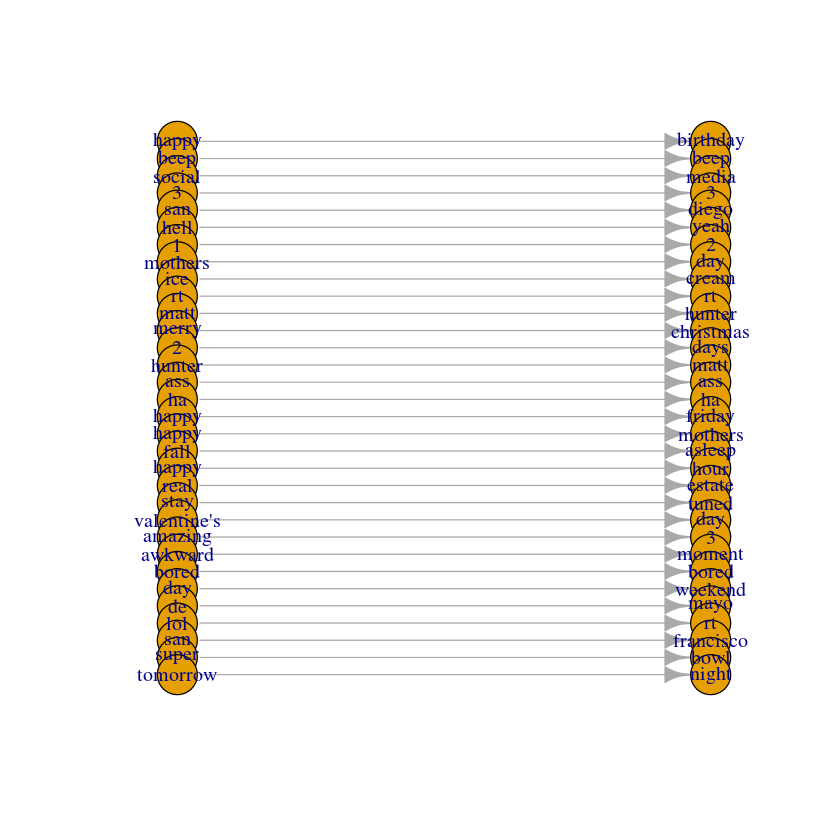

In [346]:

plot(bigram_graph, layout = layout.k_partite(bigram_graph))

In [348]:
bigram_counts$word1Vertex <- 1:numNGrams
bigram_counts$word2Vertex <- 1:numNGrams + nrow(bigram_counts)



In [362]:
length(unique(bigram_counts$word1))
length(unique(bigram_counts$word2))

[1] 8020

[1] 8125

In [385]:
uniqueWords <- unique(c(bigram_counts$word1, bigram_counts$word2))
length(uniqueWords)

[1] 11115

In [386]:
wordIndices = 1:length(uniqueWords)

In [428]:
wordCols = c('word1', 'word2')
uniqueWords <- bigram_counts %>%
    select(wordCols) %>%
    gather(,word) %>%
    select(word) %>%
    distinct() %>%
    arrange(word)

uniqueWords[1000:1010,]

nWords <- nrow(uniqueWords)
nWords

word
<chr>
awh
awhile
awks
awkward
awp2012
awresome
aws
aww
awww


[1] 11115

In [446]:
#for bipartite graph of bigrams, assign vertices for all words, then 
#use the ngrams to create edges

word2vertex <- function(word, layer){
    nWords <- nrow(uniqueWords)
    index <- which(uniqueWords$word == word)
    vertex <- index + nWords*layer
    vertex
}

nLayers <- 2

layer <- 0

word2

[1] 3314